# House price prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
Data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/himadhruthi/data.csv")
Data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [4]:
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
x= Data.drop(['date','street','street','city','statezip','country','price'],axis =1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [7]:
y = Data["price"]
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4600 non-null   float64
 1   bathrooms      4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   sqft_lot       4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 431.4 KB


In [9]:
x.corr()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426
sqft_basement,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125


<AxesSubplot:>

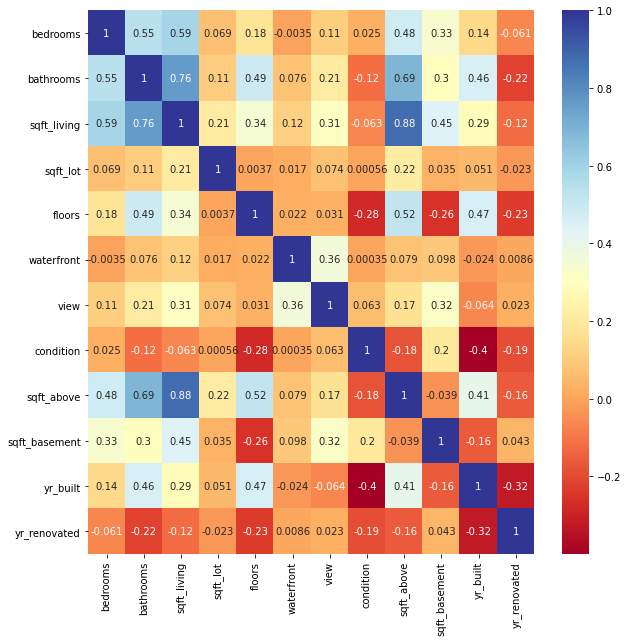

In [10]:
plt.figure(figsize=(10,10)) 
sns.heatmap(x.corr(),annot =True,cmap='RdYlBu')

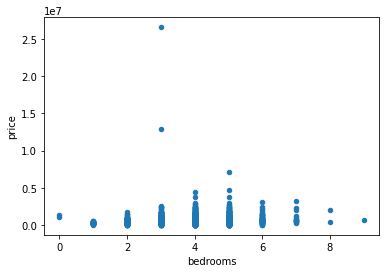

In [11]:
def Scatter(a):
    Data.plot(kind = "scatter" , x=a,y='price')
    plt.show()
Scatter('bedrooms') 

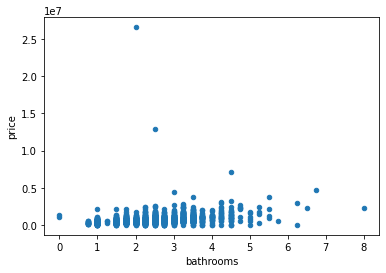

In [12]:
Scatter('bathrooms')  

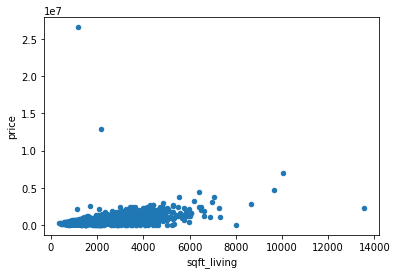

In [13]:
Scatter('sqft_living') 

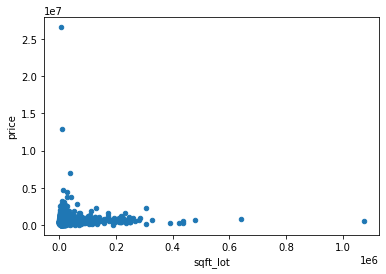

In [14]:
Scatter('sqft_lot')  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAESCAYAAADwnNLKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAc+klEQVR4nO3df5RcZZ3n8fenujudaLKQSaJimhAkAQbZEKGHqCjyQ11AhB2DCnh0118ZHPDgjkI8OsrZ486OkxlnXEDFDHKUo4MCUUAHdRB/ENQoIZuEhGhsYSFNEEJIgEDS6e767h9VHbqrq7ur03Wruur5vM7pQ1fdp259L+lzP/e597nPVURgZmbpytW7ADMzqy8HgZlZ4hwEZmaJcxCYmSXOQWBmljgHgZlZ4hoyCCTdIOlJSZsqaPsvktYXf7ZK2l2DEs3MGoYa8T4CSacCe4AbI+L4cXzuo8BrIuIDmRVnZtZgGrJHEBH3AE8Pfk/SUZJ+JOl+SaslHVvmoxcBN9WkSDOzBtFa7wKqaCVwSUT8QdIS4MvAGQMLJR0BHAn8tE71mZlNSk0RBJKmA68HbpE08HZ7SbMLgVsjor+WtZmZTXZNEQQUTnHtjojFo7S5ELi0NuWYmTWOhrxGUCoingUelvROABWcMLBc0jHATODXdSrRzGzSasggkHQThZ36MZK6JX0QeA/wQUkbgM3A+YM+chHw7WjEIVJmZhlryOGjZmZWPQ3ZIzAzs+ppuIvFs2fPjvnz59e7DDOzhnL//fc/FRFzyi1ruCCYP38+a9eurXcZZmYNRdIjIy3zqSEzs8Q5CMzMEucgMDNLnIPAzCxxDgIzs8QlFwQ79/SwYdtudu7pqXcpZmaTQsMNH52I29c/xvJVG2nL5ejN51mxdBHnLZ5b77LMzOoqmR7Bzj09LF+1kX29eZ7r6WNfb54rV210z8DMkpdMEHTv2ktbbujmtuVydO/aW6eKzMwmh2SCoGPmNHrz+SHv9ebzdMycVqeKzMwmh2SCYNb0dlYsXcTUthwz2luZ2pZjxdJFzJpe+iAzM7O0JHWx+LzFczllwWy6d+2lY+Y0h4CZGYkFARR6Bg4AM7MXJXNqyMzMynMQmJklzkFgZpY4B4GZWeIyCwJJh0v6maQtkjZLurxMm9MkPSNpffHns1nVY2Zm5WU5aqgP+HhErJM0A7hf0l0R8WBJu9URcW6GdZiZ2Sgy6xFExOMRsa74+3PAFsAzvJmZTTI1uUYgaT7wGuA3ZRa/TtIGST+U9OoRPr9M0lpJa3fs2JFlqWZmyck8CCRNB1YBH4uIZ0sWrwOOiIgTgGuA28qtIyJWRkRnRHTOmTMn03rNzFKTaRBIaqMQAt+KiO+WLo+IZyNiT/H3O4E2SbOzrMnMzIbKctSQgK8BWyLin0do84piOySdXKxnZ1Y1mZnZcFmOGjoFeC/wgKT1xfc+BcwDiIjrgAuAj0jqA/YCF0ZEZFiTmZmVyCwIIuJeQGO0uRa4NqsazMxsbL6z2MwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS5yDwMwscQ4CM7PEOQjMzBLnIDAzS1xmQSDpcEk/k7RF0mZJl5dpI0lXS+qStFHSiVnVY2Zm5bVmuO4+4OMRsU7SDOB+SXdFxIOD2pwNLCz+LAG+UvyvmZnVSGY9goh4PCLWFX9/DtgCzC1pdj5wYxSsAQ6VdFhWNZmZ2XA1uUYgaT7wGuA3JYvmAtsGve5meFggaZmktZLW7tixI7M6zcxSlHkQSJoOrAI+FhHPli4u85EY9kbEyojojIjOOXPmZFGmmVmyMg0CSW0UQuBbEfHdMk26gcMHve4AtmdZk5mZDZXlqCEBXwO2RMQ/j9DsDuB9xdFDrwWeiYjHs6rJzMyGy3LU0CnAe4EHJK0vvvcpYB5ARFwH3AmcA3QBLwDvz7AeMzMrI7MgiIh7KX8NYHCbAC7NqgYzMxub7yw2M0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxDkIzMwSl1kQSLpB0pOSNo2w/DRJz0haX/z5bFa1mJnZyFozXPfXgWuBG0dpszoizs2wBjMzG0NmPYKIuAd4Oqv1m5lZddT7GsHrJG2Q9ENJrx6pkaRlktZKWrtjx45a1mdm1vTqGQTrgCMi4gTgGuC2kRpGxMqI6IyIzjlz5tSqPjOzJNQtCCLi2YjYU/z9TqBN0ux61WNmlqqKg0DSEZLeXPx9mqQZE/liSa+QpOLvJxdr2TmRdZqZ2fhVNGpI0oeBZcCfAUcBHcB1wJmjfOYm4DRgtqRu4CqgDSAirgMuAD4iqQ/YC1wYEXHQW2JmZgel0uGjlwInA78BiIg/SHrZaB+IiIvGWH4theGlZmZWR5WeGuqJiP0DLyS1Aj56NzNrApUGwS8kfQqYJuktwC3A97Mry8zMaqXSIPgksAN4APgr4E7gb7MqyszMaqfSawTTgBsi4l8BJLUU33shq8LMzKw2Ku0R3E1hxz9gGvCT6pdjZma1VmkQTB24+Qug+PtLsinJzMxqqdIgeF7SiQMvJJ1EYey/mZk1uEqvEXwMuEXS9uLrw4B3Z1JRDezc00P3rr10zJzGrOnt9S7HzKyuKgqCiLhP0rHAMYCA30VEb6aVZeT29Y+xfNVG2nI5evN5VixdxHmL59a7LDOzuhk1CCSdERE/lfSOkkULJRER382wtqrbuaeH5as2sq83zz7yAFy5aiOnLJjtnoGZJWusHsGbgJ8Cby+zLICGCoLuXXtpy+UOhABAWy5H9669DgIzS9aoQRARV0nKAT+MiJtrVFNmOmZOozefH/Jebz5Px8xpI3zCzKz5jTlqKCLywGU1qCVzs6a3s2LpIqa25ZjR3srUthwrli5yb8DMklbpqKG7JH0C+A7w/MCbEdFwzyQ+b/FcTlkw26OGzMyKKg2CD1C4JvDXJe+/qrrl1Mas6e0OADOzokqD4DgKIfAGCoGwmsKDaczMrMFVGgTfAJ4Fri6+vqj43ruyKMrMzGqn0iA4JiJOGPT6Z5I2ZFGQmZnVVqVzDf1fSa8deCFpCfDLbEoyM7NaqrRHsAR4n6RHi6/nAVskPQBERCzKpDozM8tcpUFwVqZVmJlZ3VQ66dwjWRdiZmb1Uek1AjMza1IOAjOzxDkIzMwS5yAwM0ucg8DMLHEOAjOzxGUWBJJukPSkpE0jLJekqyV1Sdoo6cSsajEzs5Fl2SP4OqPfiHY2sLD4swz4Soa1mJnZCDILgoi4BxjtwTXnAzdGwRrgUEmHZVWPmZmVV89rBHOBbYNedxffMzOzGqpnEKjMe1G2obRM0lpJa3fs2JFxWWZmaalnEHQDhw963QFsL9cwIlZGRGdEdM6ZM6cmxZmZpaKeQXAHhamtVXzWwTMR8Xgd6zEzS1Kl01CPm6SbgNOA2ZK6gauANoCIuA64EzgH6AJeAN6fVS1mZjayzIIgIi4aY3kAl2b1/WZmVhnfWWxmljgHgZlZ4hwEZmaJcxCYmSXOQWBmljgHgZlZ4hwEZmaJcxCYmSXOQWBmljgHgZlZ4hwEZmaJcxCYmSXOQWBmljgHgZlZ4hwEZezc08OGbbvZuaen3qWYmWUus+cRNKrb1z/G8lUbacvl6M3nWbF0EectnlvvsszMMuMewSA79/SwfNVG9vXmea6nj329ea5ctdE9AzNrag6CQbp37aUtN/R/SVsuR/euvXWqyMwsew6CQTpmTqM3nx/yXm8+T8fMaXWqyMwsew6CQWZNb2fF0kVMbcsxo72VqW05VixdxKzp7fUuzcwsM75YXOK8xXM5ZcFsunftpWPmNIeAmTU9B0EZs6a3OwDMLBk+NWRmljgHgZlZ4hwEZmaJcxCYmSXOQWBmljgHgZlZ4hwEZmaJyzQIJJ0l6feSuiR9sszy0yQ9I2l98eezWdZjZmbDZXZDmaQW4EvAW4Bu4D5Jd0TEgyVNV0fEuVnVYWZmo8uyR3Ay0BURD0XEfuDbwPkZft+4+OEzZmYFWU4xMRfYNuh1N7CkTLvXSdoAbAc+ERGbSxtIWgYsA5g3b96EC/PDZ8zMXpRlj0Bl3ouS1+uAIyLiBOAa4LZyK4qIlRHRGRGdc+bMmVBRIz18puuJ59xDMLMkZdkj6AYOH/S6g8JR/wER8eyg3++U9GVJsyPiqcyKKj58Zh8vPncg8sE519xLe4t7CGaWnix7BPcBCyUdKWkKcCFwx+AGkl4hScXfTy7WszPDmso+fKanP9jf58dTmlmaMguCiOgDLgN+DGwBbo6IzZIukXRJsdkFwKbiNYKrgQsjovT0UVWVPnxmSouY2ubHU5pZupTxfrfqOjs7Y+3atRNez849PXTv2stLp7Rw7rX3sq/3xV7C1LYcv1x+hp9JYGZNQ9L9EdFZblmydxbPmt7OCYcfyoKXz2DF0kW0t+Z4yZQW2lsLj6cEfPHYzJLgJ5QxMJQpIAQEa//f01zp4aVmlohkewQDBoaT9vQFL/T209MX3Ljm0WHDS90zMLNmlXwQDAwnHY0vHptZM0vy1NDAheKOmdPKDict1ZvP0zFzWo2qMzOrreSCYPD0Evv7+7ns9IV85tzj+NwPHjxwTeBdnR3cvLZ7yDUCjyAys2aVVBAMnl5i4M7iL9y1lfbWHJ899ziOn3sIHTOnMWt6O5efefSBXoNDwMyaWVLXCEa6HtDTl+dz//7gkJ3+wPDS0hDwrKVm1myS6hF0zJxGT19f2WWKoHvX3lGP/j1rqZk1o6R6BD/a9Cd6+8sv29sXXHP31hGP9EeatdQ9AzNrdMkEwbfWPMKnb9s0bB7swX7yux287u9/wh3rHxu2rNxpJQ8rNbNmkEQQ7NzTw//8QekTMsvb30/ZI/1yw0wnOqy0Wa43NMt2mKUqiWsEhaN5sb/C9gNH+oOvFwzMWlo69cTBjihqlusNzbIdZilLIggKR/OVz7I60pH+eYvncsqC2RMeVlpuGOuVqzZyyoLZDTVUtVm2wyx1SZwamjW9nTOOrvwRl2ccO7Tt4FMfIw0rHcvgdTTL9YZm2Q6z1CXRI9i5p4f/ePCJitvf+cAT3L1lB/94wSICJnzqo/T0yWfOPa7q1xvqIYvrJmZWe0n0CLp37WX02YSG6+nLc8WtG7jy1vJDRnfu6eGerTu4Z+uTo14kLTfs9HM/eJDPvO24A09Jm9qWq+h6QzUuylbzwm7p094q3Q4zm1yS6BG8dErLQX5SqOSdtlyOb/3mUa6+eyt9xXRpaxFfeOcJZXsKA6dP9g2KorZcjuPnHsIvl59R8fWGalyUzeLCbrWum5hZ/STRI9j+zL6D+lxPX559fUP7Evv781z70xdDAKC3P7ji1vI3l3XMnMb+/qF3sQ2cPqn0ekM1bmbL8oa4g71uYmaTQxJBsPVPz1ZlPVNaclx2+gJac8N7GBEMu0i6c08P169+aEhotOYY9+mTiVyUHTgVtHn7M76wa2ZlJXFq6Psbt1dlPfv789yz9Ul6+4fPU7G/P09v34vv377+MT5+83pKOhS05HKcsmA2XU88x/ptu1lcfG7y4GcklIZEx8xp7Osb+p37+vrHvCh7+/rHuPLWDbQoR1++nyg50dWbz/PSKS1s2Lbbp3XMEpZEEDy0Y0/V1nXfI7tHXHbx137LVW8/jsNnTuOKWzYMCwGA1hbxt7dt4oeb/nTgvTcumMV9j+wa9dx9RIz4ulyIdD3xHH/znfX0B0AhRETQ3ppjSkvxuQsndXDutfcO+d7RzvePFlZm1riSCIL9veMdM3SQ39OX59Pf28TUVrG/v/wNbPv29w8JAYDVXTsLy0puyoLCaaFtTz/PlJYW+vIv9graW1vo3rWXe7ueYvmqjbTmCt/5ibceza7n9/PVXzw0bKRUAP39eZadvoCzj38Fb7tmNT19ceB7P37LBnKCKS0twwLJdxBPTg5nq4YkgqCnNjlwwL6+ke9iHiEfhmiR+MJ/bGXVum0Q0FPmQ8/v7+dnv3uCL//iIfYP6nr87zt/N+q6+wK+9PMuXtjfR09Jnb3F7xmYqntwIF1568bCxfNx3EHcSDupRqp1gMPZqqXpg6ARJ0J7fn8///bbR8ds98W7uw5q/f19ef519cNjtsshNm9/lvXbdtNTcp6r3HxMg9V7JzWeHXu9az0Ynt4jPVkerDR9EHhUzHC9QWGY0xhe6O3nwzeupa9/eJdqf//IdxDXeyc1nh17vWs9WCPdnzLWw5WsMWV9sNL0w0fXdO2odwkNracvX/Z01mWnLxhxh1PtOYgquRt6oE3XE8+N636JRp0vydN7pKMWD8Vq+h7B9feOfQrEhmpv1bDrB6XLL14y78Dr0i5rNXdSlRwJDW7T058nnx/egxnpSLlRd6jVnhbdJq9a9P4yDQJJZwH/B2gBro+Iz5csV3H5OcALwH+PiHXVrGH3C73VXF1dTWkZeTRSNfWVTNnd1qJho4kG/gBH2lFXYydVyWmbcm1K7evNjzjNSCPvUD29RxpqcbCSWRBIagG+BLwF6Abuk3RHRAx+VNjZwMLizxLgK8X/Vs30qS3s2jvCg4onKcGwR2pObctx6WkL+NLPuwpHB339B0b5VNtlpy3gq6sfGvP+gtF21NXYSVVyJFSuTan2FvH8/pH/Bhp5hzprentD1WvjV4uDlSx7BCcDXRHxEICkbwPnA4OD4HzgxijcHbVG0qGSDouIx6tVxLs753FdBSNkJouPvOlVLD2xg3OuuXfIsFCAi5fM4+Il8+jetZfevn4u+OqaYZ+f0gIXnjyPm367bVhQnLpwFr/6486yN7oNeOOCWfyPtx7D+14/f9iOsfQPb6wd9UR3UpUcCZVrU0o5jXn05B2qTWZZH6xkGQRzgW2DXncz/Gi/XJu5wJAgkLQMWAYwb948xuPDbzqqLkGQgzGnvm7NMWSn3N6a40NvfBWzprfzTxeMfAQwa3o7G7btZmpbjn2Dbpab0pLj+v92Eqce/TIuP/NoNm9/hsd27aWnr583LJjDgpfP4I71jw1b7ysPmco9f3iKUxfOpvPIWQe+Y6w/tqy7rJUcCZVr867ODm5e291wp3rMRpPlwUqWQVA6gzMMP+NRSRsiYiWwEqCzs3Nc50NmTW/n7/7r8Xz6tk3j+di4tbWIK956DMceNgMQr37lf+KXXU9xRXGun56+fiQxpTVHXz646u3HMaO9dcSd3FhHAOV2trkcvPqVhxzY7lOPftmwNiOtdyAAxqMWXdZKjoTKtbn8zKMb8lSPWT1kGQTdwOGDXncApbO/VdJmwt7z2iNA8OnvjR0Grzn8EDZvf46WXOGi6YfecCQzXzKFf7prK20toj8fQ4449/fnuez0BVy8ZN6wHU7pDgoYtnMabSc32hHARHbC1TyyqMX59UrqLW3jUz1mlVPpZGZVW7HUCmwFzgQeA+4DLo6IzYPavA24jMKooSXA1RFx8mjr7ezsjLVr1x5UTTv39PCX167m0d2F8bcvnQIvn/ES5syYwpuPewXvOLGDWdPby97BV/reZJmSYLLUYWaTm6T7I6Kz7LKsgqD4xecAX6QwfPSGiPg7SZcARMR1xeGj1wJnURg++v6IGHUvP5EgMDNL1WhBkOl9BBFxJ3BnyXvXDfo9gEuzrMHMzEbX9FNMmJnZ6BwEZmaJcxCYmSXOQWBmlrhMRw1lQdIO4JGD/Phs4KkqljMZeRsbX7NvH3gb6+GIiJhTbkHDBcFESFo70vCpZuFtbHzNvn3gbZxsfGrIzCxxDgIzs8SlFgQr611ADXgbG1+zbx94GyeVpK4RmJnZcKn1CMzMrISDwMwscU0ZBJLOkvR7SV2SPllmuSRdXVy+UdKJ9ahzIirYxvcUt22jpF9JOqEedR6ssbZvULu/kNQv6YJa1lcNlWyjpNMkrZe0WdIval3jRFXwd3qIpO9L2lDcxvfXo86DJekGSU9KKvuwk4bZ10REU/1QmPL6j8CrgCnABuC4kjbnAD+k8IS01wK/qXfdGWzj64GZxd/PbqRtrGT7BrX7KYUZbi+od90Z/BseSuEZ3/OKr19W77oz2MZPAf9Q/H0O8DQwpd61j2MbTwVOBDaNsLwh9jXN2CM4GeiKiIciYj/wbeD8kjbnAzdGwRrgUEmH1brQCRhzGyPiVxGxq/hyDYWnvzWKSv4NAT4KrAKerGVxVVLJNl4MfDciHgWIiEbbzkq2MYAZxWeTTKcQBH21LfPgRcQ9FGoeSUPsa5oxCOYC2wa97i6+N942k9l46/8ghaOSRjHm9kmaC/wlcB2NqZJ/w6OBmZJ+Lul+Se+rWXXVUck2Xgv8OYVH1D4AXB4R+dqUVxMNsa/J9ME0daIy75WOka2kzWRWcf2STqcQBG/ItKLqqmT7vggsj4j+wsFkw6lkG1uBkyg87nUa8GtJayJia9bFVUkl2/hfgPXAGcBRwF2SVkfEsxnXVisNsa9pxiDoBg4f9LqDwtHGeNtMZhXVL2kRcD1wdkTsrFFt1VDJ9nUC3y6GwGzgHEl9EXFbTSqcuEr/Tp+KiOeB5yXdA5xA4VngjaCSbXw/8PkonFDvkvQwcCzw29qUmLmG2Nc046mh+4CFko6UNAW4ELijpM0dwPuKV/RfCzwTEY/XutAJGHMbJc0Dvgu8t4GOIAeMuX0RcWREzI+I+cCtwF83UAhAZX+ntwNvlNQq6SXAEmBLjeuciEq28VEKPR4kvRw4BnioplVmqyH2NU3XI4iIPkmXAT+mMGrhhojYLOmS4vLrKIwyOQfoAl6gcFTSMCrcxs8Cs4AvF4+a+6JBZkKscPsaWiXbGBFbJP0I2Ajkgesjouwwxcmown/HzwFfl/QAhdMoyyNiMk3dPCpJNwGnAbMldQNXAW3QWPsaTzFhZpa4Zjw1ZGZm4+AgMDNLnIPAzCxxDgIzs8Q5CMzMJrGxJrYr0/5dkh4sTuL3bxV9xqOGzMwmL0mnAnsozFl0/BhtFwI3A2dExC5JL6tkjir3CMzGSVK7pJ8Up4d+t6RPVfCZPWMsny/p4upVac2i3MR2ko6S9KPiHFSrJR1bXPRh4EsDE05WOlGhg8Bs/F4DtEXE4oj4DoWplCdqPoXZRs0qsRL4aEScBHwC+HLx/aOBoyX9UtIaSWdVsrKmu7PY7GBIeimFLnUHhbtgPwc8Q2Fyu6eAdRTm1f8A8E1gjqT1wB+AacXfN0fEe8b4HgErKDwjIoD/VQyTzwN/XlzPNyLiX6q7hdYsJE2n8LyRWwZNuNhe/G8rsJDC3c4dwGpJx0fE7tHW6SAwKzgL2B4Rb4PCk7OATRRmxewCvgOFrrakDwGfiIhzi233RMTiCr/nHcBiCpPHzQbuK04m98nB6zQbRQ7YPcLfXDewJiJ6gYcl/Z5CMNw31grNrDAX/psl/YOkNwJHAg9HxB+KM2N+s0rf8wbgpojoj4gngF8Af1GldVsCilN0PyzpnXDgcZgDj6K9DTi9+P5sCqeKxpzEz0FgBhRnaD2JQiD8PXAe2cwb35APT7D6KU5s92vgGEndkj4IvAf4oKQNwGZefPLbj4Gdkh4EfgZcUckU9D41ZAZIeiXwdER8szjC5xLgSElHRcQfgYtG+XivpLZid3ws9wB/JekbwJ9ReObtFRSeWjVjYlthzSgiRvrbG3YhuNh7/ZviT8UcBGYF/xn4R0l5oBf4CIVz+P8u6SngXmCkMdwrgY2S1o11sRj4HvA6Cg9yD+DKiPiTpJ1AX/EI7+u+WGy15BvKzCog6TR8MdealK8RmJklzj0CsyqRNAu4u8yiMxvsmdGWGAeBmVnifGrIzCxxDgIzs8Q5CMzMEucgMDNL3P8Hl2VVP8UIqp4AAAAASUVORK5CYII=

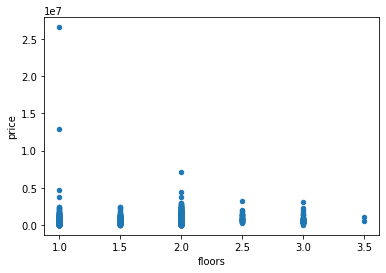

In [15]:
Scatter('floors')

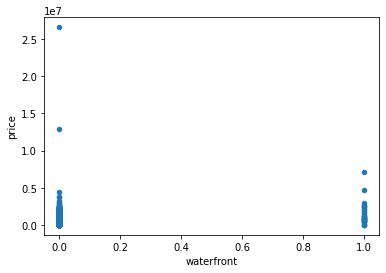

In [16]:
Scatter('waterfront') 

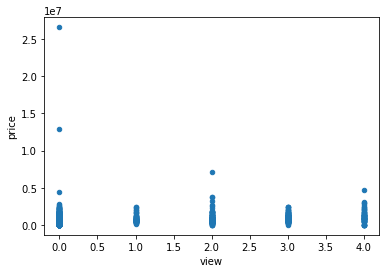

In [17]:
Scatter('view')

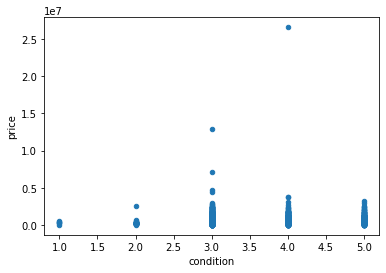

In [18]:
Scatter('condition')

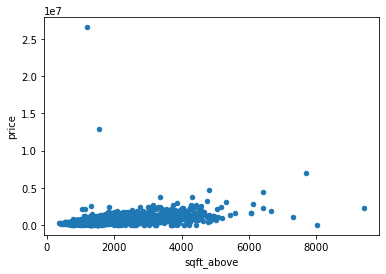

In [19]:
Scatter('sqft_above')

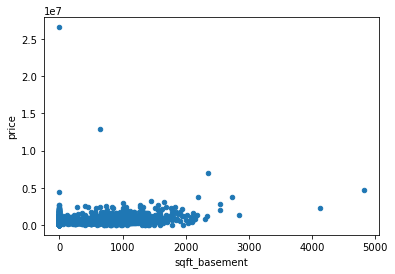

In [20]:
Scatter('sqft_basement')

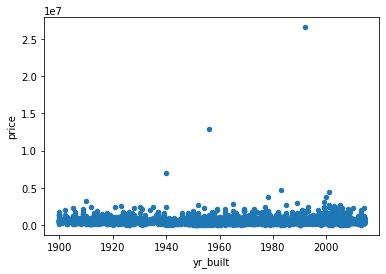

In [21]:
Scatter('yr_built')

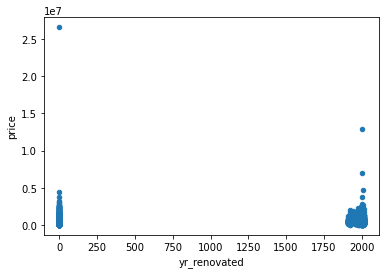

In [22]:
Scatter('yr_renovated')

In [23]:
X_mean = x.mean()
 
# Standard deviation
X_std = x.std()
 
# Standardization
Z = (x - X_mean) / X_std
print(Z)

      bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0    -0.441074  -0.843112    -0.829881 -0.193413 -0.022414   -0.084995   
1     1.759513   0.432754     1.568358 -0.161700  0.906456   -0.084995   
2    -0.441074  -0.205179    -0.217344 -0.080969 -0.951284   -0.084995   
3    -0.441074   0.113788    -0.144670 -0.190125 -0.951284   -0.084995   
4     0.659220   0.432754    -0.206962 -0.121293 -0.951284   -0.084995   
...        ...        ...          ...       ...       ...         ...   
4595 -0.441074  -0.524145    -0.653387 -0.236663 -0.951284   -0.084995   
4596 -0.441074   0.432754    -0.705297 -0.202860  0.906456   -0.084995   
4597 -0.441074   0.432754     0.903911 -0.218438  0.906456   -0.084995   
4598  0.659220  -0.205179    -0.051232 -0.229139 -0.951284   -0.084995   
4599 -0.441074   0.432754    -0.674151 -0.188118  0.906456   -0.084995   

          view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0    -0.309161  -0.667040   -0.5

In [24]:
scalar=StandardScaler()
#scalar.fit(x)
X=scalar.fit_transform(x)
print(X)


[[-0.44112227 -0.84320364 -0.82997105 ... -0.67246372 -0.53101376
   1.22167046]
 [ 1.75970468  0.43280154  1.56852826 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.44112227 -0.20520105 -0.21736733 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.44112227  0.43280154  0.90400897 ... -0.67246372  1.2854179
  -0.82569345]
 [ 0.6592912  -0.20520105 -0.05123751 ...  1.5254011   0.10810108
  -0.82569345]
 [-0.44112227  0.43280154 -0.67422434 ... -0.67246372  0.64630305
  -0.82569345]]


In [26]:
Ss = [w for w in x]
Ss

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [27]:
X = sm.add_constant( Data[Ss] )
X.head(5)

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,1.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,1.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,1.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,1.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,1.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [28]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(X, y , train_size=0.7)

In [29]:
test_x.shape

(1380, 13)

In [30]:
train_x.shape

(3220, 13)

In [31]:
model = LinearRegression()
model.fit(train_x , train_y)

LinearRegression()

In [32]:
pred_y = model.predict(test_x)
c = model.intercept_
c

4596507.247459341

In [33]:
m = model.coef_
m

array([ 0.00000000e+00, -6.35169549e+04,  6.07634606e+04,  1.70610648e+02,
       -5.91969678e-01,  3.62503877e+04,  4.05496194e+05,  3.27418491e+04,
        3.85748516e+04,  9.82494855e+01,  7.23611620e+01, -2.39190732e+03,
        4.04863974e+00])

In [34]:
print(pred_y)

[ 175336.38902299  521055.75656389  270315.74839067 ...  644250.23673443
  344889.21358581 1161871.14279958]


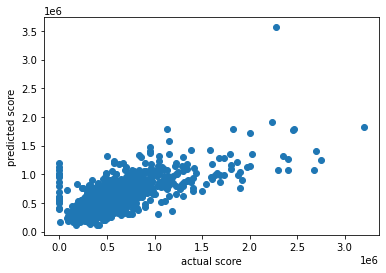

In [35]:
plt.scatter(test_y,pred_y)
plt.xlabel('actual score')
plt.ylabel('predicted score')
plt.show()

In [40]:
r2= r2_score(test_y,pred_y)
r2 

0.5024517349159334

In [37]:
model.predict([[1,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005]])

array([354729.33696997])

In [38]:
error = 367194.60858801 - 313000.0
error

54194.608588010015

In [41]:
if r2 >= 0.7:
    print("The model has a strong fit and performs well.")
elif r2 >= 0.5:
    print("The model has a moderate fit and gives decent predictions.")
else:
    print("The model may need further improvement as it has a weak fit.")

print("You can further refine the model by feature engineering and hyperparameter tuning to improve its performance.")

The model has a moderate fit and gives decent predictions.
You can further refine the model by feature engineering and hyperparameter tuning to improve its performance.


This Jupyter Notebook code begins by loading the dataset, preprocessing the data (which includes handling missing values, encoding categorical variables, and selecting relevant features), and splitting the data into training and testing sets. It then creates a Linear Regression model, fits it to the training data, makes predictions on the test data, and evaluates the model's performance using metrics.

The conclusion section interprets the results and provides guidance on potential improvements to the model. This allows you to assess how well the model is performing and what actions can be taken to enhance its accuracy.